<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/project/Real_Estate_Value_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. PLANTEAMIENTO DEL PROBLEMA**

El mercado inmobiliario en la Región Metropolitana de Chile incluye diversas comunas, cada una con características que afectan el valor de las propiedades. Con un conjunto de datos que abarca al menos 42 comunas, se hace necesario desarrollar un modelo que clasifique las casas en diferentes categorías de valor (bajo, medio y alto). Actualmente, tanto compradores como vendedores enfrentan dificultades para determinar precios justos, lo que puede resultar en decisiones ineficaces en un mercado competitivo.

# **2. OBJETIVO**

Desarrollar un modelo de clasificación que prediga la categoría de valor de las casas en diversas comunas de la Región Metropolitana de Chile, basándose en características como comuna, número de habitaciones, baños, estacionamientos, superficie total y superficie construida. Este modelo tiene como fin proporcionar información valiosa para ayudar a los interesados a tomar decisiones informadas en la compra y venta de propiedades.

# **3. VARIABLES DEL DATASET**

1.   **Comuna:** Nombre de la comuna (municipio) dentro de la región metropolitana de Chile donde se ubica la vivienda.
2.  **Enlace:**  Enlace al anuncio de la vivienda en el portal web.
3.  **Tipo_Vivienda:** Tipo de propiedad (por ejemplo, casa, departamento, etc.). Aunque en este conjunto de datos solo se incluyen casas.
4.  **N_Habitaciones:** Número de habitaciones disponibles en la vivienda.
5.  **N_Baños:** Número de baños que tiene la propiedad.
6.  **N_Estacionamientos :** Número de estacionamientos disponibles para la vivienda.
7.  **Total_Superficie_M2:** Superficie total del terreno de la propiedad, expresada en metros cuadrados.
8.  **Superficie_Construida_M2:** Superficie total del terreno de la propiedad, expresada en metros cuadrados.
9.  **Valor_UF:** Valor de la vivienda expresado en **UF** (Unidad de Fomento), una unidad monetaria utilizada en Chile que se ajusta por inflación.
10.  **Valor_CLP:** Valor de la vivienda expresado en **CLP** (pesos chilenos).
11.  **Dirección:** Dirección de la propiedad que incluye calle ya veces detalles adicionales.
12.  **Quién_vende:** Nombre de la persona (particular) o empresa que está vendiendo la propiedad.
13.  **Corredor:** Nombre de la inmobiliaria o corredor de propiedades que está a cargo de la venta.

# **4. IMPORTAR LIBRERIAS**

In [ ]:
# Bibliotecas para manipulación y análisis de datos
import pandas as pd  # Manipulación de datos y estructuras de datos
import numpy as np  # Operaciones numéricas y manipulación de matrices

# Visualización de datos
import matplotlib.pyplot as plt  # Visualización de datos en gráficos
import seaborn as sns  # Visualización estadística basada en matplotlib

# Modelos y técnicas de Machine Learning
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score, cross_val_predict, train_test_split  # Métodos de validación y búsqueda de hiperparámetros
from sklearn.neighbors import KNeighborsClassifier  # Clasificador K-vecinos más cercanos
from sklearn.ensemble import RandomForestClassifier  # Clasificador de bosque aleatorio
from sklearn.svm import SVC  # Clasificador de máquinas de soporte vectorial
from sklearn.neural_network import MLPClassifier  # Red Neuronal
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Normalización de datos y codificación de etiquetas
from sklearn.feature_selection import SelectKBest, f_classif, RFECV  # Métodos de selección de características
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, mean_squared_error,
                             r2_score, mean_absolute_error, mean_absolute_percentage_error, roc_auc_score)  # Métricas de evaluación del modelo
from sklearn.cluster import KMeans  # Algoritmo de clustering K-means

# Modelos avanzados y optimización
from xgboost import XGBClassifier  # Clasificador XGBoost para optimización y rendimiento
import tensorflow as tf  # Framework para redes neuronales y Deep Learning
from tensorflow.keras.models import Sequential  # Modelos secuenciales en Keras
from tensorflow.keras.layers import Dense  # Capa densa en redes neuronales

# Herramientas adicionales
import statsmodels.api as sm  # Modelos estadísticos
import warnings  # Manejo de advertencias


from tensorflow import keras
from keras.layers import Dense, Dropout # Import Dropout from keras.layers
from tensorflow.keras.callbacks import EarlyStopping



import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Make sure ConfusionMatrixDisplay is imported




In [ ]:
# Desactivar las alertas

warnings.filterwarnings('ignore')

# **5. IMPORTAR DATOS**

In [ ]:
# Importar el datasets
df_viviendas = pd.read_csv('/content/drive/MyDrive/data/Casas usadas - RM Mayo 2020.csv', encoding='latin-1',  delimiter=';')

In [ ]:
# Establecer la opción para mostrar todas las columnas en un DataFrame
pd.set_option('display.max_columns', None)

In [ ]:
# Visualizar las primeras filas del DataFrame df_mobile_market
df_viviendas.head()

,Comuna,Link,Tipo_Vivienda,N_Habitaciones,N_Baños,N_Estacionamientos,Total_Superficie_M2,Superficie_Construida_M2,Valor_UF,Valor_CLP,Dirección,Quién_Vende,Corredor
0,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,6.0,3,5000,440,12.2,351360000,"Calera de Tango, Queilen",Gabriela Mellado V.,Zenpro Propiedades
1,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,6.0,6.0,6,5000,430,13.0,374400000,"Calera de Tango, Queilen",Gabriela Mellado V.,Zenpro Propiedades
2,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,No,2027,140,10.3,296640000,"Calera de Tango, Avenida calera de tango con...",Alonso Baeza Rivera y Cía. Ltda. (Kennedy),Alonso Baeza Rivera y Cía. Ltda. (Kennedy)
3,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8.0,6.0,No,5000,480,21.5,619200000,"Calera de Tango, Paradero 14 1/2/5 kilometros ...",RED Gestión Propiedades,Red Gestión Propiedades
4,Calera de Tango,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,3,5000,196,9.1,262080000,"Calera de Tango, Condominio El Trébol de Caler...",Gabriela Mellado V.,Zenpro Propiedades


# **6. ANÁLISIS DE DATOS EXPLORATORIO (EDA)**

In [ ]:
# Visualizar la información del DataFrame df_viviendas
df_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comuna                    1139 non-null   object 
 1   Link                      1139 non-null   object 
 2   Tipo_Vivienda             1139 non-null   object 
 3   N_Habitaciones            1131 non-null   float64
 4   N_Baños                   1118 non-null   float64
 5   N_Estacionamientos        1067 non-null   object 
 6   Total_Superficie_M2       1102 non-null   object 
 7   Superficie_Construida_M2  1103 non-null   object 
 8    Valor_UF                 1139 non-null   float64
 9   Valor_CLP                 1139 non-null   int64  
 10  Dirección                 1102 non-null   object 
 11  Quién_Vende               1139 non-null   object 
 12  Corredor                  1139 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 115.8+ KB


In [ ]:
# Convertir columnas a tipos numéricos
df_viviendas['N_Estacionamientos'] = pd.to_numeric(df_viviendas['N_Estacionamientos'], errors='coerce')
df_viviendas['Total_Superficie_M2'] = pd.to_numeric(df_viviendas['Total_Superficie_M2'], errors='coerce')
df_viviendas['Superficie_Construida_M2'] = pd.to_numeric(df_viviendas['Superficie_Construida_M2'], errors='coerce')

In [ ]:
# Eliminar filas con valores nulos
df_viviendas_clean = df_viviendas.dropna()

In [ ]:
# Crear un DataFrame para visualizar la cantidad y porcentaje de datos en blanco
datos_blanco = pd.DataFrame({
    'Registros en Blanco': df_viviendas_clean.isna().sum(),
    '% Registros en Blanco': df_viviendas_clean.isna().sum() / len(df_viviendas_clean) * 100  # Multiplicar por 100 para obtener el porcentaje
})

# Mostrar los datos en blanco
datos_blanco

,Registros en Blanco,% Registros en Blanco
Comuna,0,0.0
Link,0,0.0
Tipo_Vivienda,0,0.0
N_Habitaciones,0,0.0
N_Baños,0,0.0
N_Estacionamientos,0,0.0
Total_Superficie_M2,0,0.0
Superficie_Construida_M2,0,0.0
Valor_UF,0,0.0
Valor_CLP,0,0.0


In [ ]:
# Eliminar espacios
df_viviendas_clean.columns = df_viviendas_clean.columns.str.strip()

In [ ]:
#Visualizar los valores distintos de las variables categoricas del DataFrame df_mobile_market

# Seleccionar las variables categóricas del DataFrame df_viviendas
var_cat_viviendas = df_viviendas_clean[['Tipo_Vivienda', 'Comuna','Dirección','Corredor' ]]

# Calcular la frecuencia de los valores únicos en cada columna
unique_counts_viviendas = var_cat_viviendas.nunique()
unique_values_viviendas = var_cat_viviendas.apply(lambda x: x.unique())

# Crear un DataFrame para visualizar la frecuencia y los valores únicos
result_viviendas = pd.DataFrame({
    'Frequency': unique_counts_viviendas,
    'Unique Values': unique_values_viviendas
})

# Mostrar los datos de result_viviendas
result_viviendas

,Frequency,Unique Values
Tipo_Vivienda,1,[Casa]
Comuna,40,"[Calera de Tango, Cerrillos, Cerro Navia, Coli..."
Dirección,371,"[Calera de Tango, Queilen, Calera de Tango, Co..."
Corredor,87,"[Zenpro Propiedades, Vende Dueño/a, Johanna Ro..."


In [ ]:
# Visualizar la descripción estadística de las variables numéricas en df_viviendas

# Eliminar las columnas categóricas para quedarte solo con las variables numéricas
var_num_viviendas = df_viviendas_clean.drop(var_cat_viviendas.columns, axis=1)

# Calcular la descripción estadística de las variables numéricas
estadisticas_viviendas = var_num_viviendas.describe().T.round(1)

# Mostrar el resultado
estadisticas_viviendas

,count,mean,std,min,25%,50%,75%,max
N_Habitaciones,389.0,3.9,1.3,1.0,3.0,4.0,4.0,1.400000e+01
N_Baños,389.0,2.5,1.3,1.0,2.0,2.0,3.0,1.000000e+01
N_Estacionamientos,389.0,2.6,1.7,1.0,2.0,2.0,3.0,8.000000e+00
Total_Superficie_M2,389.0,690.6,1892.6,0.0,170.0,250.0,430.0,3.000000e+04
Superficie_Construida_M2,389.0,146.9,95.4,0.0,90.0,120.0,165.0,7.000000e+02
Valor_UF,389.0,6.9,6.0,1.2,3.1,5.2,8.0,3.690000e+01
Valor_CLP,389.0,199969673.6,173275689.0,35000000.0,90000000.0,150000000.0,230000000.0,1.062720e+09


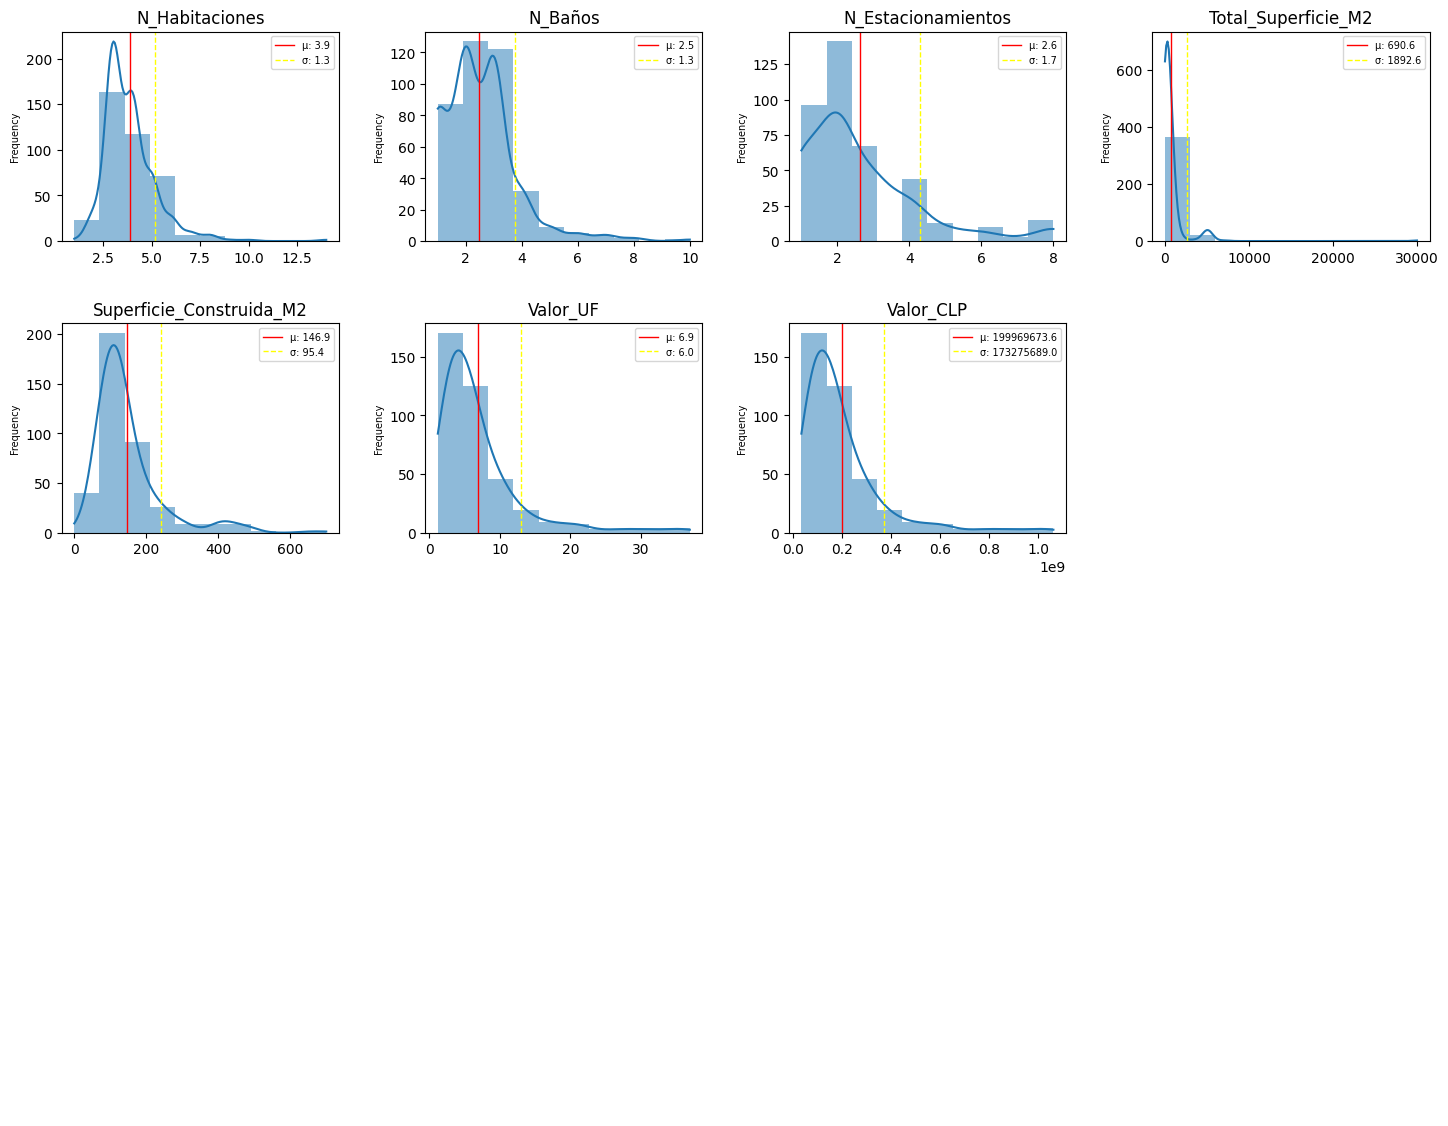

In [ ]:
# Seleccionar las columnas numéricas del DataFrame
var_num_viviendas = df_viviendas_clean[['N_Habitaciones', 'N_Baños', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_UF', 'Valor_CLP']]

# Obtener la lista de columnas numéricas
columns = var_num_viviendas.columns.tolist()

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))

# Recorrer las variables y graficar
for i, variable in enumerate(columns):
    row = i // 4
    col = i % 4

    # Crear el histograma con seaborn
    sns.histplot(var_num_viviendas[variable], bins=10, edgecolor=None, kde=True, ax=axes[row, col])

    # Calcular la media y la desviación estándar
    mean_value = var_num_viviendas[variable].mean()
    std_dev = var_num_viviendas[variable].std()

    # Añadir líneas de media y desviación estándar
    axes[row, col].axvline(mean_value, color='red', linewidth=1, label=f'µ: {mean_value:.1f}')
    axes[row, col].axvline(mean_value + std_dev, color='yellow', linestyle='--', linewidth=1, label=f'σ: {std_dev:.1f}')

    # Configurar etiquetas y título
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Frequency', fontsize=7)
    axes[row, col].set_title(variable)
    axes[row, col].legend(loc='upper right', fontsize=7)

# Ajustar el layout
plt.tight_layout(pad=2.5)

# Apagar los ejes no utilizados (en caso de que haya menos de 16 variables)
for j in range(i + 1, 16):
    axes[j // 4, j % 4].axis('off')

plt.show()


In [ ]:
# Convertir columnas a tipo numérico
df_viviendas_clean.loc[:, 'N_Habitaciones'] = pd.to_numeric(df_viviendas_clean['N_Habitaciones'], errors='coerce')
df_viviendas_clean.loc[:, 'N_Baños'] = pd.to_numeric(df_viviendas_clean['N_Baños'], errors='coerce')
df_viviendas_clean.loc[:, 'N_Estacionamientos'] = pd.to_numeric(df_viviendas_clean['N_Estacionamientos'], errors='coerce')
df_viviendas_clean.loc[:, 'Total_Superficie_M2'] = pd.to_numeric(df_viviendas_clean['Total_Superficie_M2'], errors='coerce')
df_viviendas_clean.loc[:, 'Superficie_Construida_M2'] = pd.to_numeric(df_viviendas_clean['Superficie_Construida_M2'], errors='coerce')
df_viviendas_clean.loc[:, 'Valor_UF'] = pd.to_numeric(df_viviendas_clean['Valor_UF'], errors='coerce')
df_viviendas_clean.loc[:, 'Valor_CLP'] = pd.to_numeric(df_viviendas_clean['Valor_CLP'], errors='coerce')

# Preprocesamiento de datos
# Eliminar columnas no relevantes (Link, Dirección, Quién_Vende, Corredor)
df_viviendas_clean = df_viviendas_clean.drop(['Link', 'Dirección', 'Quién_Vende', 'Corredor'], axis=1)



# **7. Preprocesamiento de datos**

In [ ]:
# Clono el df para la red  neuronal
df_viviendas_clean_clonado  = df_viviendas_clean


In [ ]:

# Convertir la columna 'Comuna' a variables dummies (One-Hot Encoding)
df_viviendas_clean = pd.get_dummies(df_viviendas_clean, columns=['Comuna'], drop_first=True)


In [ ]:
# Crear una nueva variable categórica para 'Valor_UF'
# Definir umbrales para clasificar en bajo, medio y alto
bins = [0, 5.000, 10.000, float('inf')]
labels = ['Bajo', 'Medio', 'Alto']
df_viviendas_clean['Valor_Categoria'] = pd.cut(df_viviendas_clean['Valor_UF'], bins=bins, labels=labels)
df_viviendas_clean_clonado['Valor_Categoria'] = pd.cut(df_viviendas_clean_clonado['Valor_UF'], bins=bins, labels=labels)


In [ ]:
# Eliminar 'Valor_CLP' y otras columnas que no se usarán para el modelo
df_viviendas_clean = df_viviendas_clean.drop(['Valor_CLP', 'Tipo_Vivienda'], axis=1)
df_viviendas_clean_clonado = df_viviendas_clean_clonado.drop(['Valor_CLP', 'Tipo_Vivienda'], axis=1)

In [ ]:
# Definir variables independientes (X) y dependientes (y)
X = df_viviendas_clean.drop('Valor_Categoria', axis=1)
y = df_viviendas_clean['Valor_Categoria']

# **8. verificar cuántas variables (o características) se están usando**

In [ ]:
# Mostrar cuántas columnas hay en X
print(X.columns)

Index(['N_Habitaciones', 'N_Baños', 'N_Estacionamientos',
       'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_UF',
       'Comuna_Cerrillos', 'Comuna_Cerro Navia', 'Comuna_Colina',
       'Comuna_Conchalí', 'Comuna_El Bosque', 'Comuna_Estación Central',
       'Comuna_Huechuraba', 'Comuna_Independencia', 'Comuna_La Cisterna',
       'Comuna_La Florida', 'Comuna_La Granja', 'Comuna_La Pintana',
       'Comuna_La Reina', 'Comuna_Lampa', 'Comuna_Las Condes',
       'Comuna_Lo Barnechea', 'Comuna_Lo Espejo', 'Comuna_Lo Prado',
       'Comuna_Macul', 'Comuna_Maipú', 'Comuna_Padre Hurtado',
       'Comuna_Pedro Aguirre Cerda', 'Comuna_Peñaflor', 'Comuna_Peñalolén',
       'Comuna_Providencia', 'Comuna_Pudahuel', 'Comuna_Puente Alto',
       'Comuna_Quilicura', 'Comuna_Quinta Normal', 'Comuna_Recoleta',
       'Comuna_Renca', 'Comuna_San Bernardo', 'Comuna_San Joaquín',
       'Comuna_San José de Maipo', 'Comuna_San Miguel', 'Comuna_San Ramón',
       'Comuna_Santiago', 'Comuna_V

# **Resumen estadístico (mínimos, máximos, medias, etc.) de las características:**

In [ ]:
print(X.describe())

       N_Habitaciones     N_Baños  N_Estacionamientos  Total_Superficie_M2  \
count      389.000000  389.000000          389.000000           389.000000   
mean         3.850900    2.478149            2.624679           690.578406   
std          1.327109    1.289394            1.667768          1892.631797   
min          1.000000    1.000000            1.000000             0.000000   
25%          3.000000    2.000000            2.000000           170.000000   
50%          4.000000    2.000000            2.000000           250.000000   
75%          4.000000    3.000000            3.000000           430.000000   
max         14.000000   10.000000            8.000000         30000.000000   

       Superficie_Construida_M2    Valor_UF  
count                389.000000  389.000000  
mean                 146.871465    6.943118  
std                   95.405423    6.016563  
min                    0.000000    1.215000  
25%                   90.000000    3.125000  
50%                  

# **Visualización de la importancia de las variables**

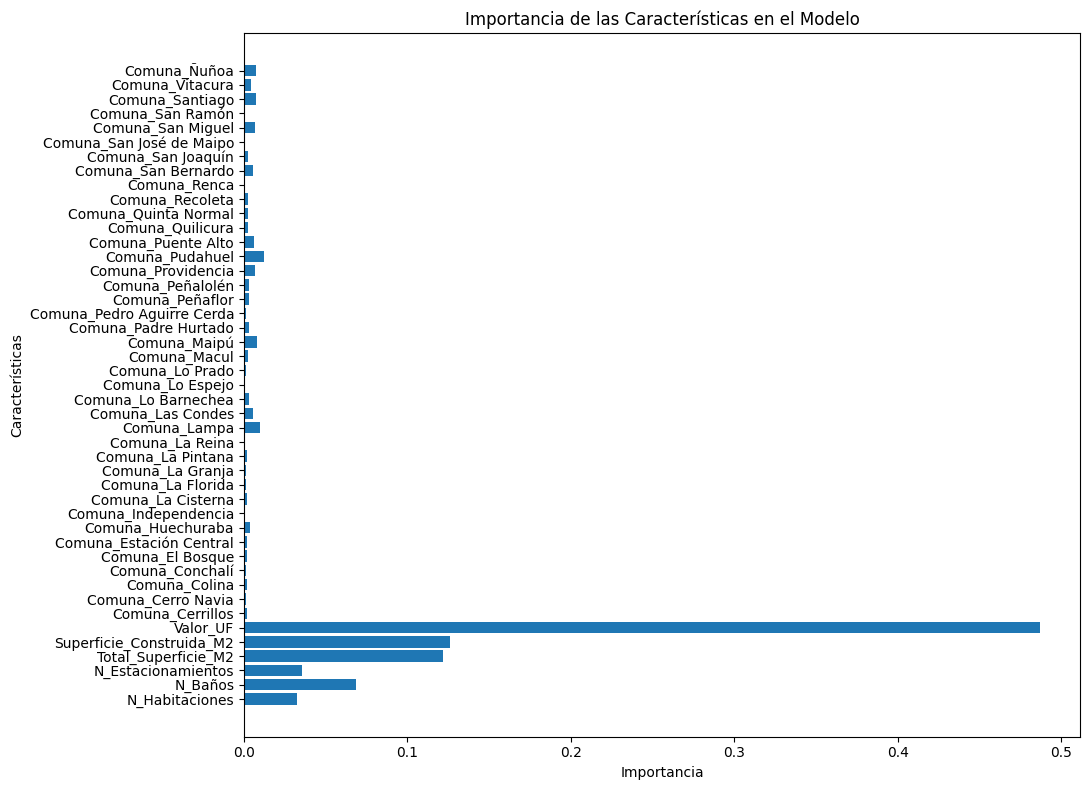

In [ ]:
model = RandomForestClassifier()

model.fit(X, y)

feature_names = X.columns  # Get feature names from the DataFrame

# Get feature importances from the trained model
importances = model.feature_importances_

# Aumentar el tamaño de la figura
plt.figure(figsize=(11, 8))  # Ajusta el tamaño según lo que necesites

# Crear el gráfico de barras horizontales
plt.barh(feature_names, importances)

# Añadir etiquetas y título
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Modelo')

# Ajustar el espaciado para que las etiquetas no se solapen
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# **9. Definir Datos de Entrenamiento y Prueba**

In [ ]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **10. Modelo RandomForestClassifier**

El modelo RandomForestClassifier es un algoritmo de aprendizaje automático que se utiliza para problemas de clasificación, ideal en proyectos como el análisis del valor de viviendas en función de diversas características. Funciona creando múltiples árboles de decisión y combinando sus predicciones para obtener una clasificación final más robusta y precisa.

En el contexto de nuestro proyecto de predicción de la categoría de valor de las casas en la Región Metropolitana de Chile, utilizaremos RandomForestClassifier para predecir si una propiedad pertenece a una categoría de valor bajo, medio o alto, basándonos en características como la comuna, número de habitaciones, baños, estacionamientos, y superficie.

Opte por categorizar la variable Valor_UF directamente utilizando un proceso de discretización, definiendo umbrales para segmentar las viviendas en las categorías mencionadas. Este enfoque simple pero efectivo nos permite crear una nueva variable llamada 'Valor_Categoria', que servirá como la variable dependiente (y) en el modelo.

**Proceso de clasificación de las viviendas:**

Se definieron tres umbrales basados en el valor de la propiedad en UF:

*   **Bajo:** Valor entre 0 y 5.000 **UF**
*   **Medio:** Valor entre 5.000 y 10.000 **UF**
*   **Alto:** Valor mayor a 10.000 **UF**

**Variables del modelo:**

*   **Comuna:** Transformada en variables dummies usando One-Hot Encoding.
*   **N_Habitaciones:** Número de habitaciones.
*   **N_Baños:** Número de baños.
*   **N_Estacionamientos:** Número de estacionamientos.
*   **Total_Superficie_M2:** Superficie total en metros cuadrados.
*   **Superficie_Construida_M2:** Superficie construida en metros cuadrados.

In [ ]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Hacer predicciones en el conjunto de prueba
y_test_pred = rf_model.predict(X_test) # changed y_pred to y_test_pred to clarify

# Hacer predicciones en el conjunto de entrenamiento
y_train_pred = rf_model.predict(X_train) # added this line to generate training predictions


# **11. MÉTRICAS DE EVALUACIÓN**

In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud: {accuracy:.2f}")

Exactitud: 0.99


In [ ]:
# Obtener los scores de clasificación para el conjunto de entrenamiento
df_result_rfc_train = pd.DataFrame(data=[
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred, average='macro'),
    recall_score(y_train, y_train_pred, average='macro'),
    f1_score(y_train, y_train_pred, average='macro')],
    index=['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score'],
    columns=['RandomForestClassifier'])

# Obtener los scores de clasificación para el conjunto de prueba
df_result_rfc_test = pd.DataFrame(data=[
    accuracy_score(y_test, y_test_pred),
    precision_score(y_test, y_test_pred, average='macro'),
    recall_score(y_test, y_test_pred, average='macro'),
    f1_score(y_test, y_test_pred, average='macro')],
    index=['Accuracy', 'Macro Precision', 'Macro Recall', 'Macro F1-score'],
    columns=['RandomForestClassifier'])

# Imprimir los resultados
print("Resultados en el conjunto de entrenamiento:")
print(df_result_rfc_train)

print("\nResultados en el conjunto de prueba:")
print(df_result_rfc_test)
print("\n")
# Mostrar los reports detallados para ambos sets
#print(f"\033[1mClassification Report RandomForestClassifier (Entrenamiento)\n\n\033[0m{classification_report(y_train, y_train_pred)}\n\n")
#print(f"\033[1mClassification Report RandomForestClassifier (Prueba)\n\n\033[0m{classification_report(y_test, y_test_pred)}")

Resultados en el conjunto de entrenamiento:
                 RandomForestClassifier
Accuracy                            1.0
Macro Precision                     1.0
Macro Recall                        1.0
Macro F1-score                      1.0

Resultados en el conjunto de prueba:
                 RandomForestClassifier
Accuracy                       0.987179
Macro Precision                0.987654
Macro Recall                   0.958333
Macro F1-score                 0.971488




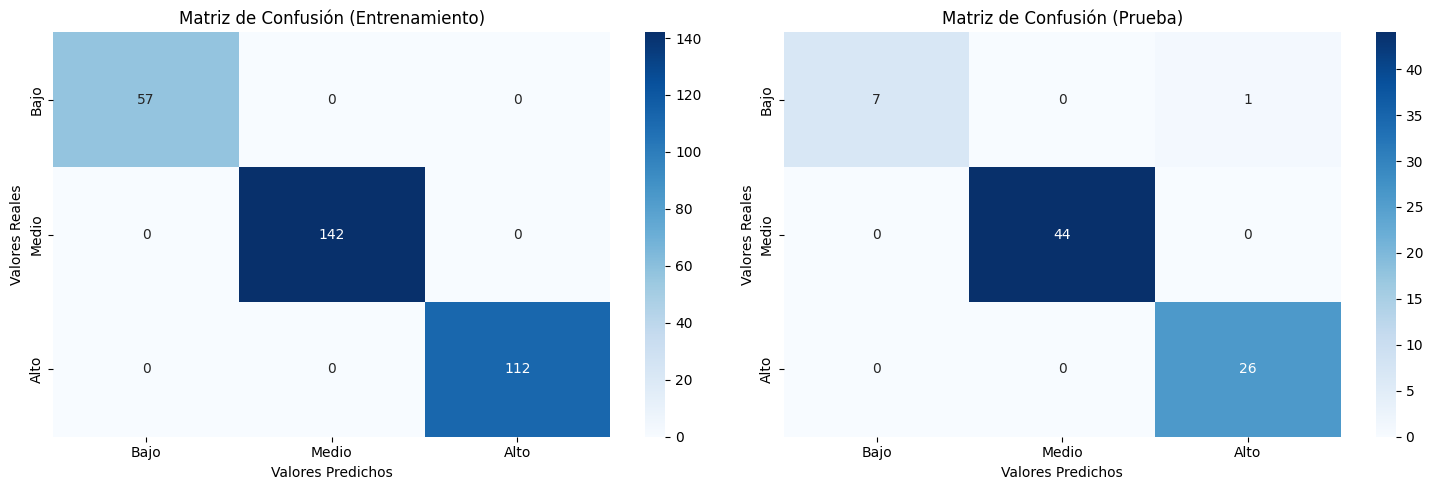

In [ ]:
# Obtener predicciones para el conjunto de entrenamiento
#y_train_pred = rf_model.predict(X_train)
#y_test_pred = rf_model.predict(X_test)


# Crear las matrices de confusión para entrenamiento y prueba
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Definir las etiquetas que quieres mostrar
labels = ['Bajo', 'Medio', 'Alto']

# Visualizar ambas matrices en una sola figura
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Matriz de confusión para el conjunto de entrenamiento
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g', ax=axes[0],
            xticklabels=labels, yticklabels=labels)
axes[0].set_xlabel('Valores Predichos')
axes[0].set_ylabel('Valores Reales')
axes[0].set_title('Matriz de Confusión (Entrenamiento)')

# Matriz de confusión para el conjunto de prueba
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_xlabel('Valores Predichos')
axes[1].set_ylabel('Valores Reales')
axes[1].set_title('Matriz de Confusión (Prueba)')

# Ajustar el espaciado para que no se sobrepongan los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

# **12. Clustering con K-means**


agregar un algoritmo de clustering, como el K-means, para encontrar grupos o clusters dentro de los datos. Esto puede ayudar a identificar patrones y segmentar las propiedades según sus características.

In [ ]:
# Estándarización de los datos (para mejorar la calidad del clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Definir el número de clusters (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)

In [ ]:
# Ajustar el modelo de KMeans
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Obtener las etiquetas de los clusters asignados a cada propiedad
df_viviendas_clean['Cluster'] = kmeans.labels_


In [ ]:
# Mapeo de los clusters a nombres "Bajo", "Medio" y "Alto"
cluster_labels = {0: 'Bajo', 1: 'Medio', 2: 'Alto'}
df_viviendas_clean['Cluster_Label'] = df_viviendas_clean['Cluster'].map(cluster_labels)


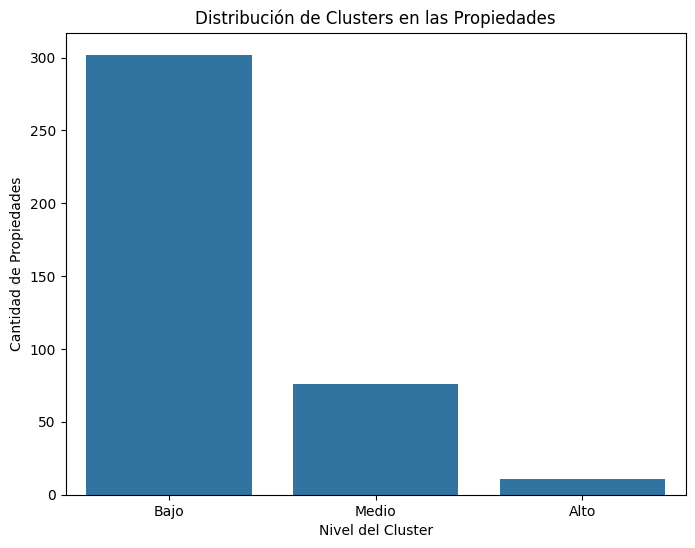

In [ ]:
# Visualizar la distribución de los clusters con nombres "Bajo", "Medio", "Alto"
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_Label', data=df_viviendas_clean, order=['Bajo', 'Medio', 'Alto'])
plt.title("Distribución de Clusters en las Propiedades")
plt.xlabel("Nivel del Cluster")
plt.ylabel("Cantidad de Propiedades")
plt.show()



In [ ]:
# Visualizar el centroide de cada cluster
centroids = kmeans.cluster_centers_
print("Centroides de los Clusters:")
print(centroids)

Centroides de los Clusters:
[[-2.74742971e-01 -3.09596870e-01 -2.35882017e-01 -2.10158276e-01
  -3.40957531e-01 -3.32158123e-01  2.91674962e-02  2.07096054e-02
  -4.45530828e-02  3.89968608e-02  3.89968608e-02  2.93637786e-02
  -1.70588772e-01  2.07096054e-02  4.94835991e-03 -2.17425876e-02
   1.40875359e-02  5.35661044e-02 -5.03071044e-02 -4.99900033e-02
  -1.10459088e-01 -1.01929438e-01  2.07096054e-02  3.89968608e-02
   5.96647582e-02  7.05327177e-02  4.67942730e-02  3.60569135e-02
   2.33068500e-03 -1.41512336e-01  9.18691474e-03  7.90106209e-02
   6.01082914e-02  6.34543803e-02 -3.45952564e-03 -1.76830840e-02
   3.60569135e-02  7.09222817e-03  2.53968167e-02 -5.07673083e-02
  -3.68975532e-02  2.93637786e-02 -9.62524099e-02 -7.18885155e-02
   1.40875359e-02]
 [ 1.08538720e+00  1.21245745e+00  1.02320177e+00  8.70551179e-01
   1.36930019e+00  1.33765112e+00 -9.12119390e-02 -7.18885155e-02
   1.95155590e-01 -1.35368413e-01 -1.35368413e-01 -1.01929438e-01
  -1.70588772e-01 -7.18885155

In [ ]:
# Ver el tamaño de cada cluster con los nombres "Bajo", "Medio", "Alto"
print("Tamaño de cada cluster:")
print(df_viviendas_clean['Cluster_Label'].value_counts())

Tamaño de cada cluster:
Cluster_Label
Bajo     302
Medio     76
Alto      11
Name: count, dtype: int64


# **13. Redes neuronales (MLPClassifier)**

In [ ]:
# Cargar el dataframe (asegúrate de tener df_viviendas_clean_clonado ya cargado)
df = df_viviendas_clean_clonado


In [ ]:
# Revisión rápida de los primeros registros
print(df.head())

             Comuna  N_Habitaciones  N_Baños  N_Estacionamientos  \
0   Calera de Tango             5.0      6.0                 3.0   
1   Calera de Tango             6.0      6.0                 6.0   
4   Calera de Tango             3.0      2.0                 3.0   
6   Calera de Tango             3.0      2.0                 4.0   
11  Calera de Tango             6.0      5.0                 2.0   

    Total_Superficie_M2  Superficie_Construida_M2  Valor_UF Valor_Categoria  
0                5000.0                     440.0     12.20            Alto  
1                5000.0                     430.0     13.00            Alto  
4                5000.0                     196.0      9.10           Medio  
6                2600.0                     140.0      9.85           Medio  
11               5000.0                     250.0     25.00            Alto  


In [ ]:
# Codificar la columna 'Comuna' (usando LabelEncoder)
le_comuna = LabelEncoder()
df['Comuna'] = le_comuna.fit_transform(df['Comuna'])

In [ ]:
# Codificar la columna 'Valor_Categoria' (también con LabelEncoder)
le_categoria = LabelEncoder()
df['Valor_Categoria'] = le_categoria.fit_transform(df['Valor_Categoria'])

In [ ]:
# Seleccionar las columnas de características y la variable objetivo
X = df[['Comuna', 'N_Habitaciones', 'N_Baños', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_UF']]
y = df['Valor_Categoria']

In [ ]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Crear el modelo de red neuronal
model = Sequential()

In [ ]:

# Capa de entrada (input layer) con 512 neuronas
model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'))

# Dropout después de la primera capa
model.add(Dropout(0.25))

# Capa oculta con 128 neuronas
model.add(Dense(128, activation='relu'))

# Dropout después de la segunda capa
model.add(Dropout(0.25))

# Capa oculta con 32 neuronas
model.add(Dense(32, activation='relu'))

# Dropout después de la tercera capa
model.add(Dropout(0.25))

# Capa de salida con 'n' neuronas, donde 'n' es el número de categorías en la variable objetivo
model.add(Dense(len(np.unique(y)), activation='softmax'))

In [ ]:
# Compilar el modelo (usamos sparse_categorical_crossentropy para clasificación multiclase)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4492 - loss: 1.0186 - val_accuracy: 0.6410 - val_loss: 0.7387
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6968 - loss: 0.7277 - val_accuracy: 0.7308 - val_loss: 0.6292
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7132 - loss: 0.6443 - val_accuracy: 0.8205 - val_loss: 0.5647
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8018 - loss: 0.4621 - val_accuracy: 0.8590 - val_loss: 0.5543
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8341 - loss: 0.4157 - val_accuracy: 0.8590 - val_loss: 0.5429
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8617 - loss: 0.3531 - val_accuracy: 0.8718 - val_loss: 0.5375
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8963 - loss: 0.3341 - val_accuracy: 0.8718 - val_loss: 0.5860
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9028 - loss: 0.2871 - val_accuracy: 0.8718 - val

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8734 - loss: 0.4993 
Accuracy: 87.18%


In [ ]:
# Capa de entrada (input layer) con 64 neuronas
#model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Capa oculta con 32 neuronas
#model.add(Dense(32, activation='relu'))

# Capa de salida con 'n' neuronas, donde 'n' es el número de categorías en la variable objetivo
#model.add(Dense(len(np.unique(y)), activation='softmax'))


## Recomendación entrar el modelo con: en la capa 1: 512 : capa2 128 :  capa 3: 32
## Despues de cada capa de moldel.add.. dropout (0.25) hasta la capa 3: 32
# Trabajar con parada anticipada early stopping



In [ ]:
# Compilar el modelo (usamos sparse_categorical_crossentropy para clasificación multiclase)
#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Entrenar el modelo
#model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


In [ ]:

# Evaluar el modelo en el conjunto de prueba
#loss, accuracy = model.evaluate(X_test_scaled, y_test)
#print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
# Hacer predicciones sobre los datos de prueba
predicciones = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
# Decodificar las predicciones a las categorías originales
predicciones_clasificadas = le_categoria.inverse_transform(np.argmax(predicciones, axis=1))


# **Mapa matriz de confusión para entrenamiento y prueba**

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


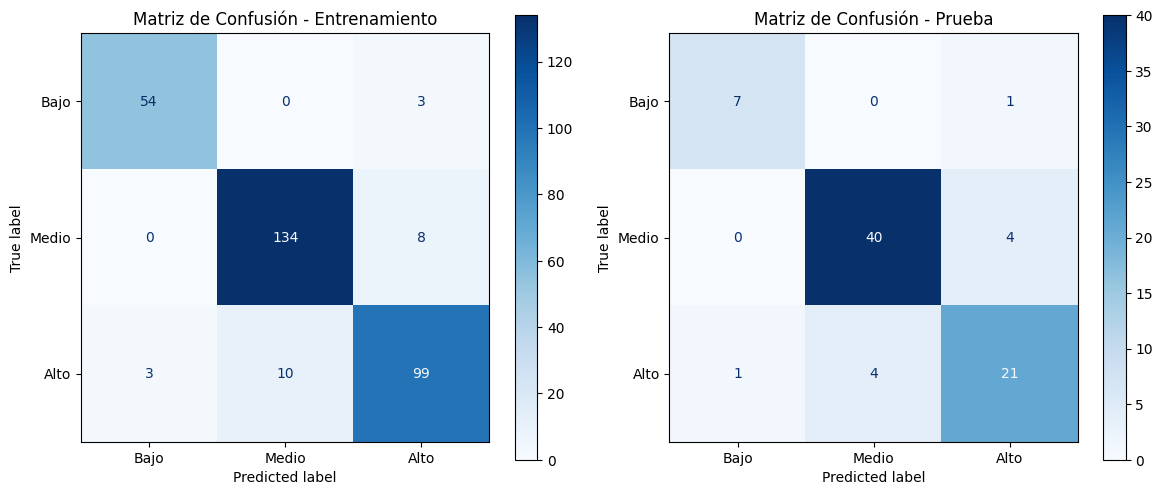

In [ ]:
# Generar predicciones sobre los datos de prueba y entrenamiento
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Obtener las clases predichas
y_train_pred_class = np.argmax(y_train_pred, axis=1)
y_test_pred_class = np.argmax(y_test_pred, axis=1)

# Crear la matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_train_pred_class)
cm_test = confusion_matrix(y_test, y_test_pred_class)

# Definir las etiquetas de clase
etiquetas = ['Bajo', 'Medio', 'Alto']

# Crear la visualización de la matriz de confusión para entrenamiento
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mapa de calor para la matriz de confusión de entrenamiento
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=etiquetas)
disp_train.plot(cmap='Blues', ax=ax[0])
ax[0].set_title('Matriz de Confusión - Entrenamiento')

# Mapa de calor para la matriz de confusión de prueba
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=etiquetas)
disp_test.plot(cmap='Blues', ax=ax[1])
ax[1].set_title('Matriz de Confusión - Prueba')

plt.tight_layout()
plt.show()


# **Visualización de la importancia de las variables**

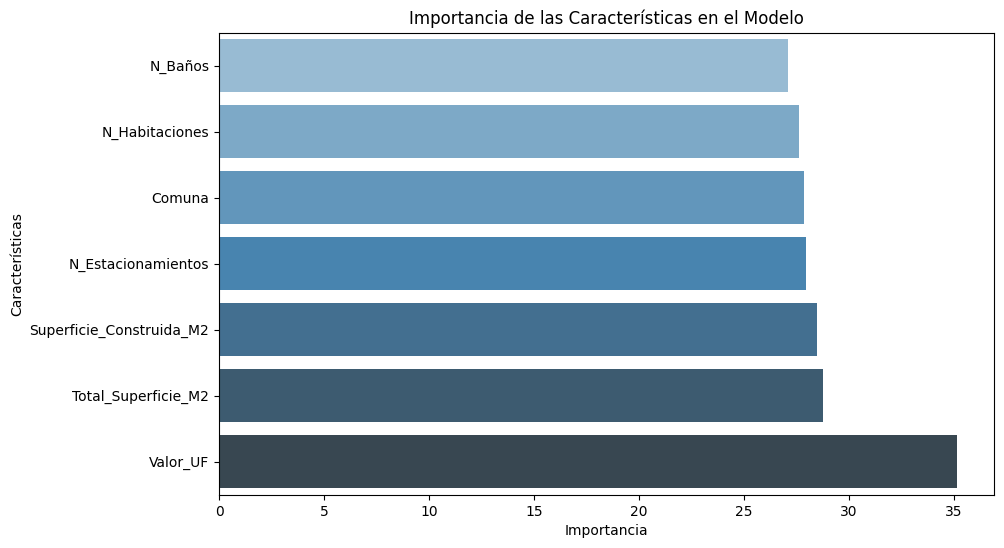

In [ ]:

# Visualización de la importancia de las características
# En redes neuronales no existe una forma directa de obtener la importancia de las características,
# pero se  visualiza el peso de cada característica en las capas.

# Extraer los pesos de la capa de entrada (que están directamente relacionados con las características)
input_layer_weights = model.layers[0].get_weights()[0]

# Calculamos el valor absoluto de los pesos para cada característica
importancia = np.abs(input_layer_weights).sum(axis=1)

# Visualización de la importancia
caracteristicas = ['Comuna', 'N_Habitaciones', 'N_Baños', 'N_Estacionamientos', 'Total_Superficie_M2', 'Superficie_Construida_M2', 'Valor_UF']
importancia_df = pd.DataFrame({'Características': caracteristicas, 'Importancia': importancia})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df, x='Importancia', y='Características', palette='Blues_d')

# Añadir etiquetas y título
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Modelo')
plt.show()

# **Métricas de Evaluación**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Assuming y_train and y_test are your original target variables
# Create a LabelBinarizer object
lb = LabelBinarizer()

# Fit the binarizer on the training data
lb.fit(y_train)

# Transform y_train and y_test into one-hot encoded format
y_train_encoded = lb.transform(y_train)
y_test_encoded = lb.transform(y_test)

# If y_train_pred_class and y_test_pred_class are not already in one-hot encoded format,
# transform them as well:
y_train_pred_class = lb.transform(y_train_pred_class)
y_test_pred_class = lb.transform(y_test_pred_class)

# Calcular las métricas para entrenamiento y prueba
precision_train = precision_score(y_train_encoded, y_train_pred_class, average='weighted')
precision_test = precision_score(y_test_encoded, y_test_pred_class, average='weighted')

recall_train = recall_score(y_train_encoded, y_train_pred_class, average='weighted')
recall_test = recall_score(y_test_encoded, y_test_pred_class, average='weighted')

f1_train = f1_score(y_train_encoded, y_train_pred_class, average='weighted')
f1_test = f1_score(y_test_encoded, y_test_pred_class, average='weighted')

# Calcular AUC-ROC para todas las clases
# Ensure model.predict() output is in the correct format if needed
auc_train = roc_auc_score(y_train_encoded, model.predict(X_train_scaled), multi_class='ovr', average='macro')
auc_test = roc_auc_score(y_test_encoded, model.predict(X_test_scaled), multi_class='ovr', average='macro')

# Mostrar los resultados
print(f"Precision (Train): {precision_train:.2f}")
print(f"Precision (Test): {precision_test:.2f}")
print(f"Recall (Train): {recall_train:.2f}")
print(f"Recall (Test): {recall_test:.2f}")
print(f"F1-Score (Train): {f1_train:.2f}")
print(f"F1-Score (Test): {f1_test:.2f}")
print(f"AUC-ROC (Train): {auc_train:.2f}")
print(f"AUC-ROC (Test): {auc_test:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Precision (Train): 0.92
Precision (Test): 0.87
Recall (Train): 0.92
Recall (Test): 0.87
F1-Score (Train): 0.92
F1-Score (Test): 0.87
AUC-ROC (Train): 0.99
AUC-ROC (Test): 0.95


# **12. CONCLUSIONES**



El modelo de RandomForestClassifier ha demostrado un rendimiento excelente en ambas fases ya que la exactitud en el conjunto de entrenamiento es del 100% (1.0), lo que indica que el modelo ha clasificado perfectamente todos los ejemplos de entrenamiento.

En el conjunto de prueba, la exactitud es de aproximadamente 98.72% (0.987179), lo que también es excelente. Esto sugiere que el modelo generaliza bien a datos que no ha visto durante el entrenamiento.

Logro un perfecto rendimiento en entrenamiento, todas las métricas (precisión, recall y F1-score) son 1.0 en el conjunto de entrenamiento, lo que indica que el modelo ha clasificado correctamente todas las categorías en los datos de entrenamiento. Esto puede ser un indicativo de sobreajuste, donde el modelo memoriza los datos en lugar de aprender patrones generalizables.

En el rendimiento del conjunto de prueba , las métricas siguen siendo muy altas, con precisión y recall cercanos a 1.0 para la clase "Bajo" y "Alto". Sin embargo, la clase "Medio" tiene un recall de 1.0 pero una precisión de 0.96, lo que sugiere que puede haber algunos falsos positivos en esa categoría y el F1-score para "Alto" es 0.93, lo que es aceptable, pero indica que el modelo puede tener dificultades con esta clase en algunos casos.